In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import os


In [2]:
os.getcwd()

'/Users/rongshen/data-challenge-urw/Data-Challenge-URW-HEC'

In [3]:
os.listdir()

['.DS_Store',
 'Reading ressources',
 'raw_data',
 'README.md',
 'notebook-rong.ipynb',
 '.git',
 'notebooks']

In [9]:
os.chdir('raw_data')

In [10]:
mall=pd.read_csv('mall_v1.csv')
store=pd.read_csv('store_v1.csv')
reference=pd.read_csv('referenciel_traffic_v1.csv')
people_flow=pd.read_csv('people_flow_v1.csv')
dwell_time=pd.read_csv('dwell_time_v1.csv')
cost=pd.read_csv('cost_v1.csv')
mall_traffic=pd.read_csv('mall_traffic.csv')

In [11]:
# drop duplicate rows
store.drop_duplicates(inplace=True)
mall.drop_duplicates(inplace=True)
people_flow.drop_duplicates(inplace=True)
dwell_time.drop_duplicates(inplace=True)
reference.drop_duplicates(inplace=True)
cost.drop_duplicates(inplace=True)
mall_traffic.drop_duplicates(inplace=True)

# deprecated

In [ ]:
# check null rows
print(mall.isnull().sum())
print("\n")
print(store.isnull().sum())
print("\n")
print(reference.isnull().sum())

mall_name          0
mall_country       0
mall_id            0
total_mall_area    0
dtype: int64


store_name                  0
store_id                    0
mall_id                     0
store_year_opened           0
store_year_closed       10918
store_branch_level_1        0
store_branch_level_2        0
store_branch_level_3        0
store_sales_r12m            0
store_rent_r12m             0
store_area                  0
dtype: int64


store_id              209
block_id            11530
external_mall_id    11530
dtype: int64


In [ ]:
print(people_flow.isnull().sum())
print("\n")
print(dwell_time.isnull().sum())
print("\n")
print(cost.isnull().sum())

block_id                             0
external_mall_id                     0
store_visits_monthly_average         0
store_window_flow_monthly_average    0
store_visits_daily_average           0
store_window_flow_daily_average      0
store_total_visits                   0
store_total_window_flow              0
days_with_traffic_data               0
dtype: int64


external_mall_id      0
block_id              0
average_dwell_time    0
median_dwell_time     0
dtype: int64


store_id                    544
rent_incentive_r12m           0
service_charges_r12m          0
marketing_costs_r12m          0
administration_fees_r12m      0
real_estate_taxes_r12m        0
large_scale_works_r12m        0
maintenance_works_r12m        0
dtype: int64


In [ ]:
# fill in nan with 0
store['store_year_closed'] = store['store_year_closed'].fillna('open')
store.head()

,store_name,store_id,mall_id,store_year_opened,store_year_closed,store_branch_level_1,store_branch_level_2,store_branch_level_3,store_sales_r12m,store_rent_r12m,store_area
0,store_0,0,0,01/01/1999,31/08/2023,Culture & Media & Technology,Mobile Phones & Communication,Mobile Phones & Communication & Internet,2482679.0,305241.0,180.0
1,store_1,1,0,28/10/2010,open,Services,Clothing-related services,Clothes repairs,1693316.0,663785.0,379.0
2,store_2,2,0,28/10/2010,open,Culture & Media & Technology,Electronics and household appliances,Monobrand electronics,2954560.0,326322.0,162.0
3,store_3,3,0,28/10/2010,open,Bags & Footwear & Accessories,Accessories,"Mixed: small accessories, bags and fancy jewel...",9706951.0,1189964.0,268.0
4,store_4,4,0,28/10/2010,open,Services,Photo services,Photo Development,4217850.0,145534.0,33.0


# EDA

1. store data

In [12]:
store

,store_name,store_id,mall_id,store_year_opened,store_year_closed,store_branch_level_1,store_branch_level_2,store_branch_level_3,store_sales_r12m,store_rent_r12m,store_area
0,store_0,0,0,01/01/1999,31/08/2023,Culture & Media & Technology,Mobile Phones & Communication,Mobile Phones & Communication & Internet,8058961.0,52824.0,0.00
1,store_1,1,0,28/10/2010,NaN,Services,Clothing-related services,Clothes repairs,291179.0,NaN,89.00
2,store_2,2,0,28/10/2010,NaN,Culture & Media & Technology,Electronics and household appliances,Monobrand electronics,NaN,184498.0,115.00
3,store_3,3,0,28/10/2010,NaN,Bags & Footwear & Accessories,Accessories,"Mixed: small accessories, bags and fancy jewel...",NaN,396868.0,81.00
4,store_4,4,0,28/10/2010,NaN,Services,Photo services,Photo Development,5536831.0,501842.0,59.00
...,...,...,...,...,...,...,...,...,...,...,...
15546,store_5866,15546,85,15/09/2023,NaN,Food & Beverage Services,"Bars, Coffee and Tea breaks",Seated Cafes & Kiosks,141430.0,92820.0,181.63
15547,store_5867,15547,85,12/05/2024,NaN,Food & Beverage Services,Sweet moments,Icecreams & Frozen yogurts,292239.0,1077736.0,30.94
15548,store_5868,15548,85,03/06/2024,NaN,Health & Beauty,"Perfumery, beautycare",Monobrand mainstream,NaN,NaN,86.12
15549,store_5869,15549,85,01/03/2024,NaN,Health & Beauty,"Perfumery, beautycare",Multibrand mainstream,13334056.0,203089.0,39.58


In [13]:
store.info()
store.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15551 entries, 0 to 15550
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   store_name            15551 non-null  object 
 1   store_id              15551 non-null  int64  
 2   mall_id               15551 non-null  int64  
 3   store_year_opened     15551 non-null  object 
 4   store_year_closed     4633 non-null   object 
 5   store_branch_level_1  15551 non-null  object 
 6   store_branch_level_2  15551 non-null  object 
 7   store_branch_level_3  15551 non-null  object 
 8   store_sales_r12m      11782 non-null  float64
 9   store_rent_r12m       11332 non-null  float64
 10  store_area            15551 non-null  float64
dtypes: float64(3), int64(2), object(6)
memory usage: 1.3+ MB


,store_id,mall_id,store_sales_r12m,store_rent_r12m,store_area
count,15551.000000,15551.000000,1.178200e+04,1.133200e+04,15551.000000
mean,7775.000000,41.605299,5.535310e+06,6.196981e+05,329.811045
std,4489.331353,26.667235,2.800365e+07,1.730915e+06,1193.688852
min,0.000000,0.000000,0.000000e+00,-2.880512e+06,0.000000
25%,3887.500000,16.000000,4.764200e+05,8.447000e+04,0.000000
50%,7775.000000,43.000000,1.122014e+06,1.778185e+05,92.000000
75%,11662.500000,67.000000,3.120401e+06,4.271578e+05,234.000000
max,15550.000000,85.000000,1.615037e+09,6.461468e+07,25677.190000


In [14]:
store['is_open'] = store['store_year_closed'].isna()
store

,store_name,store_id,mall_id,store_year_opened,store_year_closed,store_branch_level_1,store_branch_level_2,store_branch_level_3,store_sales_r12m,store_rent_r12m,store_area,is_open
0,store_0,0,0,01/01/1999,31/08/2023,Culture & Media & Technology,Mobile Phones & Communication,Mobile Phones & Communication & Internet,8058961.0,52824.0,0.00,False
1,store_1,1,0,28/10/2010,NaN,Services,Clothing-related services,Clothes repairs,291179.0,NaN,89.00,True
2,store_2,2,0,28/10/2010,NaN,Culture & Media & Technology,Electronics and household appliances,Monobrand electronics,NaN,184498.0,115.00,True
3,store_3,3,0,28/10/2010,NaN,Bags & Footwear & Accessories,Accessories,"Mixed: small accessories, bags and fancy jewel...",NaN,396868.0,81.00,True
4,store_4,4,0,28/10/2010,NaN,Services,Photo services,Photo Development,5536831.0,501842.0,59.00,True
...,...,...,...,...,...,...,...,...,...,...,...,...
15546,store_5866,15546,85,15/09/2023,NaN,Food & Beverage Services,"Bars, Coffee and Tea breaks",Seated Cafes & Kiosks,141430.0,92820.0,181.63,True
15547,store_5867,15547,85,12/05/2024,NaN,Food & Beverage Services,Sweet moments,Icecreams & Frozen yogurts,292239.0,1077736.0,30.94,True
15548,store_5868,15548,85,03/06/2024,NaN,Health & Beauty,"Perfumery, beautycare",Monobrand mainstream,NaN,NaN,86.12,True
15549,store_5869,15549,85,01/03/2024,NaN,Health & Beauty,"Perfumery, beautycare",Multibrand mainstream,13334056.0,203089.0,39.58,True


In [20]:
store_group=store.groupby(["store_branch_level_1"]).agg({"store_id":"count","store_sales_r12m": "mean",
    "store_rent_r12m": "mean","store_area":"mean","is_open":"count"}).reset_index()
store_group = store_group.sort_values(by=["store_id"], ascending=False)
store_group

,store_branch_level_1,store_id,store_sales_r12m,store_rent_r12m,store_area,is_open
5,Fashion apparel,4062,5.351079e+06,612254.133782,354.753444,4062
7,Food & Beverage Services,3373,4.971698e+06,605699.754386,161.188568,3373
10,Health & Beauty,2012,5.265614e+06,623571.534341,146.003429,2012
1,Bags & Footwear & Accessories,1365,4.801276e+06,718463.437052,147.281634,1365
2,Culture & Media & Technology,920,8.634489e+06,565092.759420,354.264826,920
12,Jewellery,786,6.237878e+06,656671.385935,72.952774,786
11,Home,602,6.519736e+06,609915.190583,438.058123,602
17,Sport,598,4.470385e+06,437422.745283,449.722826,598
9,Gifts,534,4.937148e+06,612117.819095,197.488614,534
16,Services,481,9.265809e+06,731609.911932,84.592474,481


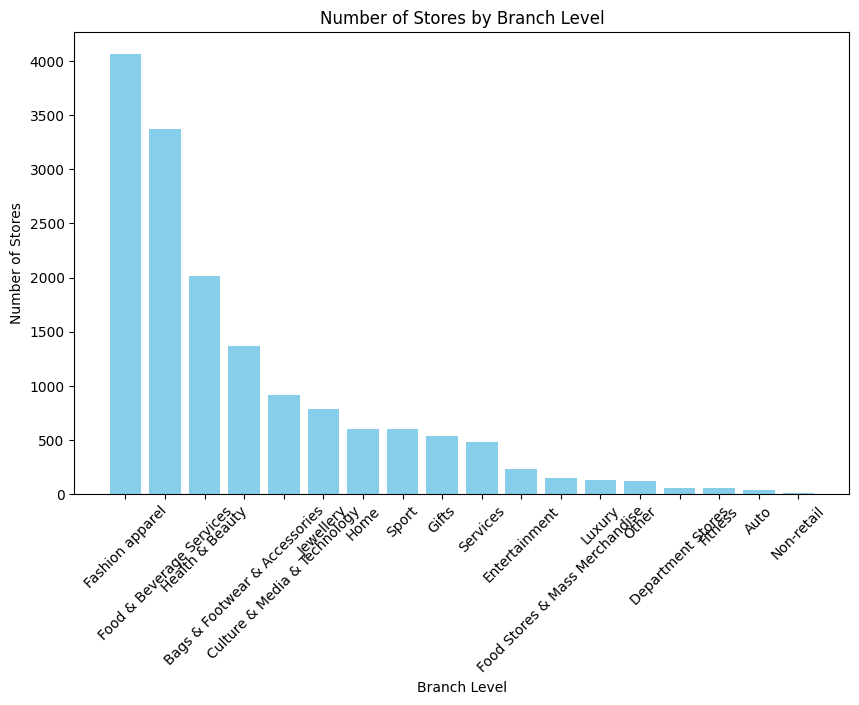

In [21]:
import matplotlib.pyplot as plt

# Bar chart for store count
plt.figure(figsize=(10, 6))
plt.bar(store_group['store_branch_level_1'], store_group['store_id'], color='skyblue')
plt.title('Number of Stores by Branch Level')
plt.xlabel('Branch Level')
plt.ylabel('Number of Stores')
plt.xticks(rotation=45)
plt.show()


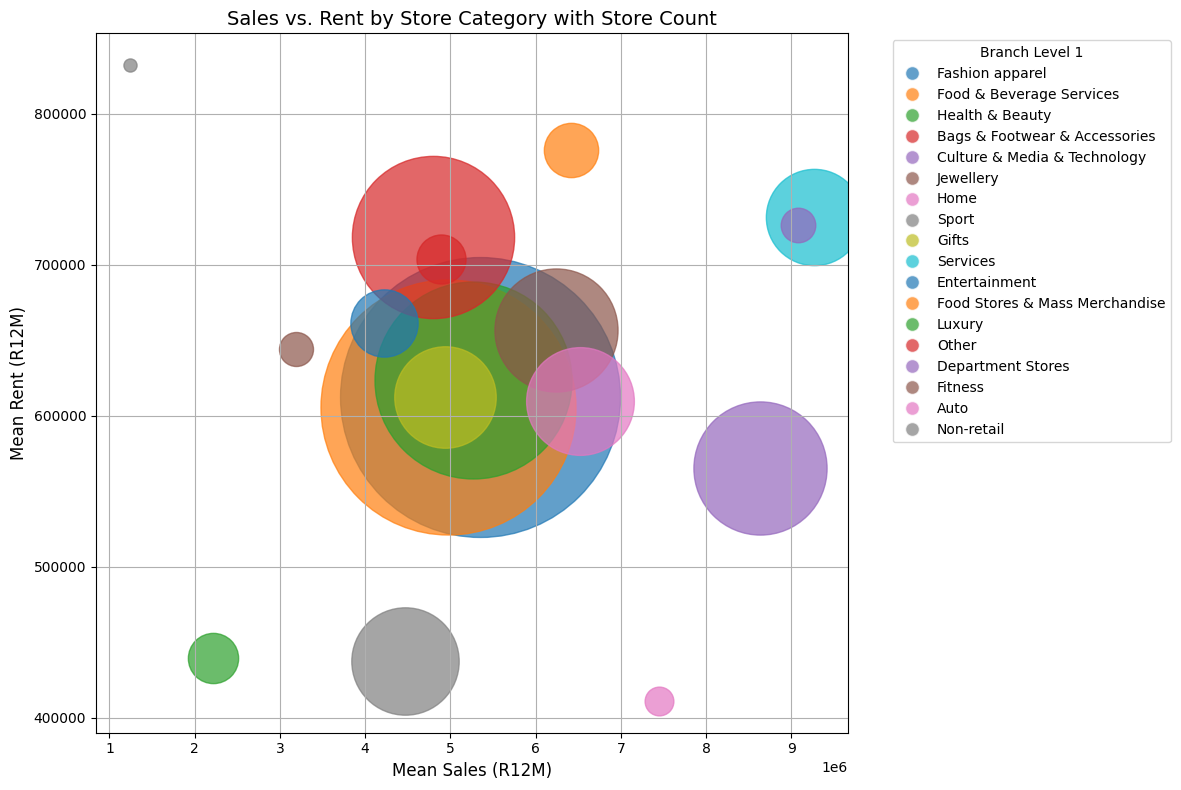

In [25]:
# Create the bubble chart
plt.figure(figsize=(12, 8))

# Loop through each category in `store_branch_level_1`
categories = store_group['store_branch_level_1'].unique()
for category in categories:
    subset = store_group[store_group['store_branch_level_1'] == category]
    plt.scatter(subset['store_sales_r12m'], subset['store_rent_r12m'],
                s=subset['store_id'] * 10,  # Bubble size
                alpha=0.7, label=category)

# Chart details
plt.title('Sales vs. Rent by Store Category with Store Count', fontsize=14)
plt.xlabel('Mean Sales (R12M)', fontsize=12)
plt.ylabel('Mean Rent (R12M)', fontsize=12)
plt.grid(True)

# Customize legend markers
handles, labels = plt.gca().get_legend_handles_labels()
legend_markers = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=h.get_facecolor()[0], markersize=10) 
                  for h in handles]
plt.legend(legend_markers, labels, title='Branch Level 1', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


2. mall data

In [16]:
mall

,mall_name,mall_country,mall_id,total_mall_area
0,Westfield Donau Zentrum,Austria,0,108440.8
1,Westfield Shopping City Süd,Austria,1,120306.9
2,Centrum Černý Most,Czech Republic,2,73294.3
3,Metropole Zličín,Czech Republic,3,47569.9
4,Westfield Chodov,Czech Republic,4,91831.5
...,...,...,...,...
81,Westfield Valley Fair,USA,81,93617.0
82,Westfield Galleria at Roseville,USA,82,62297.6
83,Westfield Wheaton,USA,83,118554.4
84,Westfield Fulton Center,USA,84,941.7


In [15]:
mall.info()
mall.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mall_name        86 non-null     object 
 1   mall_country     86 non-null     object 
 2   mall_id          86 non-null     int64  
 3   total_mall_area  85 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.8+ KB


,mall_id,total_mall_area
count,86.000000,85.000000
mean,42.500000,60339.905882
std,24.969982,37531.068639
min,0.000000,941.700000
25%,21.250000,35087.800000
50%,42.500000,49913.000000
75%,63.750000,78169.200000
max,85.000000,189072.100000


In [26]:
mall_group=mall.groupby(["mall_country"]).agg({"mall_id":"count","total_mall_area": "mean",
    }).reset_index()
mall_group = mall_group.sort_values(by=["mall_id"], ascending=False)
mall_group

,mall_country,mall_id,total_mall_area
3,France,19,59898.321053
12,USA,16,67734.050000
6,Germany Third Parties,12,34230.858333
5,Germany,9,60721.533333
10,Spain,7,53012.842857
8,Poland,6,47053.150000
1,Czech Republic,3,70898.566667
7,Netherlands,3,55573.433333
11,Sweden,3,69848.833333
13,United Kingdom,3,175984.250000


In [28]:
# filter westfield malls
filter_malls = mall[mall['mall_name'].str.contains("Westfield", case=False, na=False)]
filter_malls

,mall_name,mall_country,mall_id,total_mall_area
0,Westfield Donau Zentrum,Austria,0,108440.8
1,Westfield Shopping City Süd,Austria,1,120306.9
4,Westfield Chodov,Czech Republic,4,91831.5
5,Westfield Mokotow,Poland,5,65330.2
6,Westfield Arkadia,Poland,6,77325.5
12,Westfield Parly 2,France,12,108792.5
14,Westfield Vélizy 2,France,14,104280.1
15,Westfield Rosny 2,France,15,98221.7
17,Westfield La Part Dieu,France,17,141267.4
19,Westfield Forum Des Halles,France,19,74438.4


In [31]:
mall_group_filtered=filter_malls.groupby(["mall_country"]).agg({"mall_id":"count","total_mall_area": "mean",
    }).reset_index()
mall_group_filtered = mall_group_filtered.sort_values(by=["mall_id"], ascending=False)
mall_group_filtered

,mall_country,mall_id,total_mall_area
8,USA,16,67734.050000
2,France,9,89730.055556
3,Germany,3,99773.833333
6,Spain,3,66865.333333
0,Austria,2,114373.850000
5,Poland,2,71327.850000
7,Sweden,2,79816.750000
9,United Kingdom,2,175984.250000
1,Czech Republic,1,91831.500000
4,Netherlands,1,93262.500000


3. people flow

In [32]:
people_flow

,block_id,external_mall_id,store_visits_monthly_average,store_window_flow_monthly_average,store_visits_daily_average,store_window_flow_daily_average,store_total_visits,store_total_window_flow,days_with_traffic_data
0,6191,25,9802.91,946624.91,371.83,35906.46,107832,10412874,290
1,6199,25,9392.77,981521.23,333.62,34862.78,122106,12759776,366
2,6515,26,3916.33,637980.33,192.61,31376.08,11749,1913941,61
3,5908,23,6812.62,255764.69,241.98,9084.54,88564,3324941,366
4,5909,23,4949.77,255781.85,175.81,9085.15,64347,3325164,366
...,...,...,...,...,...,...,...,...,...
3920,5732,28,211.00,100923.00,70.33,33641.00,211,100923,3
3921,1329,16,2117.00,4210.00,1058.50,2105.00,2117,4210,2
3922,6050,23,121.00,56119.00,60.50,28059.50,121,56119,2
3923,7691,13,2519.00,163547.00,629.75,40886.75,2519,163547,4


In [33]:
people_flow.info()
people_flow.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3925 entries, 0 to 3924
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   block_id                           3925 non-null   int64  
 1   external_mall_id                   3925 non-null   int64  
 2   store_visits_monthly_average       3925 non-null   float64
 3   store_window_flow_monthly_average  3925 non-null   float64
 4   store_visits_daily_average         3925 non-null   float64
 5   store_window_flow_daily_average    3925 non-null   float64
 6   store_total_visits                 3925 non-null   int64  
 7   store_total_window_flow            3925 non-null   int64  
 8   days_with_traffic_data             3925 non-null   int64  
dtypes: float64(4), int64(5)
memory usage: 276.1 KB


,block_id,external_mall_id,store_visits_monthly_average,store_window_flow_monthly_average,store_visits_daily_average,store_window_flow_daily_average,store_total_visits,store_total_window_flow,days_with_traffic_data
count,3925.000000,3925.000000,3925.000000,3.925000e+03,3925.000000,3925.000000,3.925000e+03,3.925000e+03,3925.000000
mean,5610.776561,20.858089,21814.665159,6.402419e+05,818.091427,24053.732372,2.274013e+05,6.577796e+06,279.093758
std,2979.151073,8.101169,37832.902036,4.267443e+05,1402.590466,15603.780332,4.301958e+05,5.204717e+06,106.051181
min,1.000000,7.000000,0.000000,1.612000e+03,0.000000,318.300000,0.000000e+00,1.612000e+03,2.000000
25%,4294.000000,14.000000,4692.330000,3.642680e+05,178.010000,13726.250000,4.255100e+04,3.052443e+06,225.000000
50%,5989.000000,19.000000,10066.850000,5.501475e+05,381.150000,21116.380000,9.614000e+04,5.527613e+06,318.000000
75%,7128.000000,28.000000,23129.570000,8.048536e+05,867.210000,30467.630000,2.373360e+05,8.466128e+06,366.000000
max,14857.000000,36.000000,573582.890000,6.131568e+06,20648.980000,217787.930000,7.216023e+06,7.971038e+07,366.000000


In [34]:
people_flow.nunique()

block_id                             3840
external_mall_id                       20
store_visits_monthly_average         3895
store_window_flow_monthly_average    3863
store_visits_daily_average           3846
store_window_flow_daily_average      3847
store_total_visits                   3887
store_total_window_flow              3863
days_with_traffic_data                284
dtype: int64

4. dwell time

In [35]:
dwell_time

,external_mall_id,block_id,average_dwell_time,median_dwell_time
0,18,11273,249.520051,180.0
1,18,11271,190.005359,120.0
2,17,4319,1325.216860,780.0
3,36,1201,621.422549,240.0
4,36,1212,217.833860,120.0
...,...,...,...,...
3576,18,11264,255.038595,180.0
3577,10,4706,294.363131,240.0
3578,17,4271,316.565137,180.0
3579,10,4535,699.828561,540.0


In [36]:
dwell_time.info()
dwell_time.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3581 entries, 0 to 3580
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   external_mall_id    3581 non-null   int64  
 1   block_id            3581 non-null   int64  
 2   average_dwell_time  3581 non-null   float64
 3   median_dwell_time   3581 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 112.0 KB


,external_mall_id,block_id,average_dwell_time,median_dwell_time
count,3581.000000,3581.000000,3581.000000,3581.000000
mean,20.798660,5647.431723,885.921972,572.588662
std,8.068662,2989.393456,844.457551,770.219678
min,7.000000,2.000000,114.512500,60.000000
25%,14.000000,4320.000000,369.052374,180.000000
50%,19.000000,5997.000000,538.937056,240.000000
75%,28.000000,7143.000000,1046.187758,480.000000
max,36.000000,14841.000000,7462.603878,6840.000000


5. mall traffic

In [37]:
mall_traffic

,external_mall_id,visits_in_monthly_average,visits_out_monthly_average,visits_in_daily_average,visits_out_daily_average,total_visits_in,total_visits_out,avg_dwell_time
0,22,1197271.33,1260582.83,42132.72,44360.69,14367256,15126994,50.00
1,17,1037618.54,1028069.77,36855.30,36516.14,13489041,13364907,57.78
2,26,956199.08,715704.54,33963.36,25421.20,12430588,9304159,62.82
3,33,818284.91,794831.55,28305.45,27494.17,9001134,8743147,61.43
4,24,1179555.92,1047198.00,41896.80,37195.56,15334227,13613574,42.75
5,10,1312435.69,1328568.46,46616.57,47189.59,17061664,17271390,55.17
6,14,2436163.31,2263950.77,86530.39,80413.55,31670123,29431360,52.16
7,25,1384573.46,1264055.23,49178.84,44898.14,17999455,16432718,53.26
8,32,2951948.17,2823763.83,111394.27,106557.13,17711689,16942583,59.66
9,28,1092480.92,1080722.08,38803.97,38386.30,14202252,14049387,72.01


In [38]:
mall_traffic.info()
mall_traffic.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   external_mall_id            20 non-null     int64  
 1   visits_in_monthly_average   20 non-null     float64
 2   visits_out_monthly_average  20 non-null     float64
 3   visits_in_daily_average     20 non-null     float64
 4   visits_out_daily_average    20 non-null     float64
 5   total_visits_in             20 non-null     int64  
 6   total_visits_out            20 non-null     int64  
 7   avg_dwell_time              20 non-null     float64
dtypes: float64(5), int64(3)
memory usage: 1.4 KB


,external_mall_id,visits_in_monthly_average,visits_out_monthly_average,visits_in_daily_average,visits_out_daily_average,total_visits_in,total_visits_out,avg_dwell_time
count,20.000000,2.000000e+01,2.000000e+01,20.000000,20.00000,2.000000e+01,2.000000e+01,20.000000
mean,21.000000,1.496055e+06,1.412065e+06,54457.596500,51439.83400,1.697432e+07,1.594192e+07,58.113000
std,8.194992,1.096514e+06,9.822873e+05,38853.771976,34829.40003,1.439508e+07,1.286113e+07,12.763684
min,7.000000,6.422985e+05,6.170052e+05,28305.450000,25421.20000,2.569194e+06,2.468021e+06,27.840000
25%,14.750000,9.356111e+05,8.956102e+05,35517.037500,35400.16000,1.105444e+07,1.030968e+07,52.985000
50%,20.500000,1.096860e+06,1.057267e+06,40503.065000,38328.65000,1.295981e+07,1.247120e+07,57.865000
75%,26.500000,1.330470e+06,1.280184e+06,47257.137500,45471.00250,1.722417e+07,1.656018e+07,61.700000
max,36.000000,5.348833e+06,4.757924e+06,189985.880000,168997.28000,6.953483e+07,6.185301e+07,84.760000


6. cost data

In [39]:
cost

,store_id,rent_incentive_r12m,service_charges_r12m,marketing_costs_r12m,administration_fees_r12m,real_estate_taxes_r12m,large_scale_works_r12m,maintenance_works_r12m
0,0.0,NaN,16197.0,10101.0,NaN,NaN,NaN,NaN
1,55.0,NaN,NaN,14420.0,NaN,NaN,652.0,NaN
2,259.0,NaN,NaN,2424.0,NaN,NaN,3481.0,44779.0
3,226.0,NaN,511.0,47797.0,NaN,3452.0,NaN,NaN
4,104.0,NaN,6509.0,2469.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
14650,15517.0,NaN,15580.0,0.0,NaN,NaN,NaN,NaN
14651,15505.0,NaN,NaN,0.0,7947.0,NaN,NaN,NaN
14652,15506.0,NaN,NaN,0.0,NaN,9598.0,NaN,NaN
14653,15540.0,NaN,73503.0,0.0,NaN,NaN,NaN,NaN


In [40]:
cost.info()
cost.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 14640 entries, 0 to 14654
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   store_id                  14111 non-null  float64
 1   rent_incentive_r12m       267 non-null    float64
 2   service_charges_r12m      10789 non-null  float64
 3   marketing_costs_r12m      14630 non-null  float64
 4   administration_fees_r12m  2822 non-null   float64
 5   real_estate_taxes_r12m    6836 non-null   float64
 6   large_scale_works_r12m    2322 non-null   float64
 7   maintenance_works_r12m    4616 non-null   float64
dtypes: float64(8)
memory usage: 1.0 MB


,store_id,rent_incentive_r12m,service_charges_r12m,marketing_costs_r12m,administration_fees_r12m,real_estate_taxes_r12m,large_scale_works_r12m,maintenance_works_r12m
count,14111.000000,2.670000e+02,1.078900e+04,14630.000000,2822.000000,6.836000e+03,2322.00000,4.616000e+03
mean,7752.111544,-3.768888e+04,4.504703e+04,5149.943951,7701.347980,3.407683e+04,8087.26615,4.263614e+04
std,4689.895842,1.737333e+05,1.070110e+05,10556.891751,11011.669325,7.174417e+04,25086.06339,8.208257e+04
min,0.000000,-2.543159e+06,-1.172870e+05,-42151.000000,-6180.000000,-2.781400e+04,-196553.00000,-7.997900e+04
25%,3562.500000,-2.287900e+04,6.001000e+03,0.000000,2603.250000,4.371250e+03,976.75000,1.037000e+03
50%,7192.000000,-7.824000e+03,1.747200e+04,0.000000,4935.500000,1.233500e+04,2776.00000,6.268500e+03
75%,12006.500000,0.000000e+00,4.264000e+04,6701.500000,8998.750000,3.293250e+04,7336.75000,5.407800e+04
max,15550.000000,9.000000e+04,3.071876e+06,218914.000000,213470.000000,1.257501e+06,658168.00000,1.528918e+06


7. reference data

In [41]:
reference.info()
reference.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 4254 entries, 0 to 4254
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   store_id          4027 non-null   float64
 1   block_id          4254 non-null   int64  
 2   external_mall_id  4254 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 132.9 KB


,store_id,block_id,external_mall_id
count,4027.000000,4254.000000,4254.000000
mean,5927.816737,5492.687353,20.676070
std,3857.237452,3030.021534,8.153155
min,1.000000,1.000000,7.000000
25%,2033.500000,2970.000000,14.000000
50%,5434.000000,5849.500000,19.000000
75%,9902.500000,7075.750000,28.000000
max,12429.000000,14857.000000,36.000000


In [42]:
reference.dropna(subset='store_id', inplace=True)
reference

,store_id,block_id,external_mall_id
0,1845.0,7413,30
1,1271.0,4680,10
4,1451.0,4605,10
5,12114.0,11596,32
6,1886.0,7444,30
...,...,...,...
4250,5191.0,1819,16
4251,4773.0,5031,14
4252,5888.0,25,7
4253,5652.0,4316,17


# Merge data

## Store-level data

In [43]:
# 1. store cost
store_cost=store.merge(cost,on="store_id", how="left")
store_cost = store_cost.sort_values(by="store_id")
store_cost


,store_name,store_id,mall_id,store_year_opened,store_year_closed,store_branch_level_1,store_branch_level_2,store_branch_level_3,store_sales_r12m,store_rent_r12m,store_area,is_open,rent_incentive_r12m,service_charges_r12m,marketing_costs_r12m,administration_fees_r12m,real_estate_taxes_r12m,large_scale_works_r12m,maintenance_works_r12m
0,store_0,0,0,01/01/1999,31/08/2023,Culture & Media & Technology,Mobile Phones & Communication,Mobile Phones & Communication & Internet,8058961.0,52824.0,0.00,False,NaN,16197.0,10101.0,NaN,NaN,NaN,NaN
1,store_1,1,0,28/10/2010,NaN,Services,Clothing-related services,Clothes repairs,291179.0,NaN,89.00,True,NaN,1801.0,9007.0,NaN,NaN,424.0,NaN
2,store_2,2,0,28/10/2010,NaN,Culture & Media & Technology,Electronics and household appliances,Monobrand electronics,NaN,184498.0,115.00,True,NaN,29733.0,0.0,NaN,12361.0,NaN,42319.0
3,store_3,3,0,28/10/2010,NaN,Bags & Footwear & Accessories,Accessories,"Mixed: small accessories, bags and fancy jewel...",NaN,396868.0,81.00,True,NaN,NaN,3580.0,NaN,NaN,NaN,NaN
4,store_4,4,0,28/10/2010,NaN,Services,Photo services,Photo Development,5536831.0,501842.0,59.00,True,NaN,338444.0,1309.0,1639.0,414791.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15546,store_5866,15546,85,15/09/2023,NaN,Food & Beverage Services,"Bars, Coffee and Tea breaks",Seated Cafes & Kiosks,141430.0,92820.0,181.63,True,NaN,11728.0,0.0,7663.0,NaN,NaN,1685.0
15547,store_5867,15547,85,12/05/2024,NaN,Food & Beverage Services,Sweet moments,Icecreams & Frozen yogurts,292239.0,1077736.0,30.94,True,NaN,7315.0,8993.0,7980.0,9239.0,NaN,NaN
15548,store_5868,15548,85,03/06/2024,NaN,Health & Beauty,"Perfumery, beautycare",Monobrand mainstream,NaN,NaN,86.12,True,NaN,NaN,5835.0,NaN,9211.0,NaN,NaN
15549,store_5869,15549,85,01/03/2024,NaN,Health & Beauty,"Perfumery, beautycare",Multibrand mainstream,13334056.0,203089.0,39.58,True,NaN,90798.0,5424.0,NaN,NaN,NaN,NaN


In [ ]:
store_cost.describe()

,store_id,mall_id,store_sales_r12m,store_rent_r12m,store_area,rent_incentive_r12m,service_charges_r12m,marketing_costs_r12m,administration_fees_r12m,real_estate_taxes_r12m,large_scale_works_r12m,maintenance_works_r12m
count,15551.000000,15551.000000,1.555100e+04,1.555100e+04,15551.000000,14111.000000,14111.000000,14111.000000,14111.000000,14111.000000,14111.000000,14111.000000
mean,7775.000000,41.605299,5.127043e+06,6.985887e+05,253.988554,-63411.081851,50641.823046,7065.350365,8456.519807,43599.245270,8538.674864,61796.481964
std,4489.331353,26.667235,2.873217e+06,3.805422e+05,147.454482,35425.533961,28891.739906,4094.622685,4134.709777,24585.550287,4744.373858,35501.394808
min,0.000000,0.000000,1.988980e+05,4.161900e+04,0.000000,-124076.000000,559.000000,0.000000,1281.000000,1310.000000,327.000000,399.000000
25%,3887.500000,16.000000,2.666029e+06,3.691690e+05,126.000000,-94219.000000,25535.000000,3507.500000,4945.000000,22005.500000,4399.500000,30977.500000
50%,7775.000000,43.000000,5.113358e+06,6.973190e+05,253.000000,-63405.000000,50189.000000,7062.000000,8388.000000,43842.000000,8548.000000,61895.000000
75%,11662.500000,67.000000,7.598824e+06,1.029146e+06,381.000000,-32857.500000,75801.000000,10646.000000,12053.000000,64834.000000,12712.000000,92254.000000
max,15550.000000,85.000000,1.011080e+07,1.353180e+06,510.000000,-1761.000000,101161.000000,14143.000000,15614.000000,85856.000000,16634.000000,123259.000000


In [44]:
# 2. store visitor flow
store_flow=store.merge(reference,on="store_id",how="left")\
            .merge(people_flow,on=["block_id","external_mall_id"],how="left")
store_flow

,store_name,store_id,mall_id,store_year_opened,store_year_closed,store_branch_level_1,store_branch_level_2,store_branch_level_3,store_sales_r12m,store_rent_r12m,...,is_open,block_id,external_mall_id,store_visits_monthly_average,store_window_flow_monthly_average,store_visits_daily_average,store_window_flow_daily_average,store_total_visits,store_total_window_flow,days_with_traffic_data
0,store_0,0,0,01/01/1999,31/08/2023,Culture & Media & Technology,Mobile Phones & Communication,Mobile Phones & Communication & Internet,8058961.0,52824.0,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,store_1,1,0,28/10/2010,NaN,Services,Clothing-related services,Clothes repairs,291179.0,NaN,...,True,7643.0,13.0,3002.8,288589.8,109.59,10532.47,30028.0,2885898.0,274.0
2,store_2,2,0,28/10/2010,NaN,Culture & Media & Technology,Electronics and household appliances,Monobrand electronics,NaN,184498.0,...,True,7569.0,13.0,5811.9,337197.8,211.34,12261.74,58119.0,3371978.0,275.0
3,store_3,3,0,28/10/2010,NaN,Bags & Footwear & Accessories,Accessories,"Mixed: small accessories, bags and fancy jewel...",NaN,396868.0,...,True,7646.0,13.0,12053.5,332214.6,435.14,11993.31,120535.0,3322146.0,277.0
4,store_4,4,0,28/10/2010,NaN,Services,Photo services,Photo Development,5536831.0,501842.0,...,True,7672.0,13.0,4144.1,288628.9,151.80,10572.49,41441.0,2886289.0,273.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15775,store_5866,15546,85,15/09/2023,NaN,Food & Beverage Services,"Bars, Coffee and Tea breaks",Seated Cafes & Kiosks,141430.0,92820.0,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15776,store_5867,15547,85,12/05/2024,NaN,Food & Beverage Services,Sweet moments,Icecreams & Frozen yogurts,292239.0,1077736.0,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15777,store_5868,15548,85,03/06/2024,NaN,Health & Beauty,"Perfumery, beautycare",Monobrand mainstream,NaN,NaN,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15778,store_5869,15549,85,01/03/2024,NaN,Health & Beauty,"Perfumery, beautycare",Multibrand mainstream,13334056.0,203089.0,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# Check for duplicates in reference
duplicates_reference = reference[reference.duplicated(subset=["store_id"], keep=False)]
print("Duplicate rows in reference (store_id):", len(duplicates_reference))

# Check for duplicates in people_flow
duplicates_people_flow = people_flow[people_flow.duplicated(subset=["block_id", "external_mall_id"], keep=False)]
print("Duplicate rows in people_flow (block_id, external_mall_id):", len(duplicates_people_flow))

Duplicate rows in reference (store_id): 184
Duplicate rows in people_flow (block_id, external_mall_id): 169


In [46]:
# Check for rows where store_id duplicates after the merge
duplicates_store_flow = store_flow[store_flow.duplicated(subset=["store_id"], keep=False)]
print("Duplicate rows in store_flow (store_id):", len(duplicates_store_flow))

duplicates_store_flow


Duplicate rows in store_flow (store_id): 437


,store_name,store_id,mall_id,store_year_opened,store_year_closed,store_branch_level_1,store_branch_level_2,store_branch_level_3,store_sales_r12m,store_rent_r12m,...,is_open,block_id,external_mall_id,store_visits_monthly_average,store_window_flow_monthly_average,store_visits_daily_average,store_window_flow_daily_average,store_total_visits,store_total_window_flow,days_with_traffic_data
33,store_33,33,0,01/11/1986,NaN,Services,Multiservices shops,Multiservices shops,3850875.0,65384.0,...,True,7664.0,13.0,3017.90,772143.90,108.95,27875.23,30179.0,7721439.0,277.0
34,store_33,33,0,01/11/1986,NaN,Services,Multiservices shops,Multiservices shops,3850875.0,65384.0,...,True,7600.0,13.0,3244.10,294793.00,117.12,10642.35,32441.0,2947930.0,277.0
83,store_79,82,0,02/07/2012,NaN,Food Stores & Mass Merchandise,Supermarkets,Supermarkets,2114704.0,151119.0,...,True,7673.0,13.0,138049.00,393892.20,5056.74,14428.29,1380490.0,3938922.0,273.0
84,store_79,82,0,02/07/2012,NaN,Food Stores & Mass Merchandise,Supermarkets,Supermarkets,2114704.0,151119.0,...,True,7674.0,13.0,29557.00,248471.20,1082.67,9101.51,295570.0,2484712.0,273.0
154,store_145,152,0,19/10/2016,14/04/2024,Health & Beauty,"Perfumery, beautycare",Monobrand mainstream,23774.0,NaN,...,False,7691.0,13.0,3290.33,1253111.00,120.38,45845.52,19742.0,7518666.0,164.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12477,store_505,12251,68,13/09/2011,01/09/2024,Bags & Footwear & Accessories,Footwear,Family footwear,18259226.0,74888.0,...,False,11594.0,32.0,10307.00,1548283.67,475.71,71459.25,30921.0,4644851.0,65.0
12478,store_505,12251,68,13/09/2011,01/09/2024,Bags & Footwear & Accessories,Footwear,Family footwear,18259226.0,74888.0,...,False,11594.0,32.0,10766.00,624461.50,828.15,48035.50,21532.0,1248923.0,26.0
12641,store_342,12414,68,27/03/2024,NaN,Fashion apparel,Family Fashion,Family Fashion,492001.0,261549.0,...,True,11374.0,32.0,234156.17,1876449.00,8836.08,70809.40,1404937.0,11258694.0,159.0
12642,store_342,12414,68,27/03/2024,NaN,Fashion apparel,Family Fashion,Family Fashion,492001.0,261549.0,...,True,11517.0,32.0,170197.50,965826.00,6422.55,36446.26,1021185.0,5794956.0,159.0


In [47]:
# Check for rows where store_id duplicates after the merge
duplicates_ref = reference[reference.duplicated(subset=["store_id"], keep=False)]
print("Duplicate rows in ref (store_id):", len(duplicates_ref))

# Inspect a few examples of duplicates
duplicates_ref


Duplicate rows in ref (store_id): 184


,store_id,block_id,external_mall_id
54,2173.0,6973,33
55,2173.0,6972,33
151,5814.0,4373,17
152,5814.0,4371,17
222,7125.0,1131,36
...,...,...,...
4205,1355.0,4765,10
4221,11048.0,2242,24
4222,11048.0,2341,24
4245,2232.0,6891,33


In [48]:
print("Unique block_id + external_mall_id combinations in store_flow:", store_flow[["block_id", "external_mall_id"]].drop_duplicates().shape[0])
print("Unique block_id + external_mall_id combinations in reference:", reference[["block_id", "external_mall_id"]].drop_duplicates().shape[0])
print("Unique block_id + external_mall_id combinations in people_flow:", people_flow[["block_id", "external_mall_id"]].drop_duplicates().shape[0])

Unique block_id + external_mall_id combinations in store_flow: 3880
Unique block_id + external_mall_id combinations in reference: 3879
Unique block_id + external_mall_id combinations in people_flow: 3840


## Mall-level data

In [49]:
store_mall=store.merge(filter_malls,on="mall_id",how="inner")
store_mall_group=store_mall.groupby(["mall_country","mall_name","store_branch_level_1"]).agg({"store_sales_r12m": "mean",
    "store_rent_r12m": "mean","store_id":"count"}).reset_index()

store_mall_group["sale_rent"]=store_mall_group["store_sales_r12m"]/store_mall_group["store_rent_r12m"]
store_mall_group = store_mall_group.sort_values(by=["mall_country","sale_rent"])

store_mall_group

,mall_country,mall_name,store_branch_level_1,store_sales_r12m,store_rent_r12m,store_id,sale_rent
26,Austria,Westfield Shopping City Süd,Non-retail,7.619710e+05,1.221293e+06,1,0.623905
17,Austria,Westfield Shopping City Süd,Entertainment,1.019199e+06,8.819980e+05,9,1.155557
22,Austria,Westfield Shopping City Süd,Gifts,2.024929e+06,6.197250e+05,13,3.267463
20,Austria,Westfield Shopping City Süd,Food & Beverage Services,3.922785e+06,1.099638e+06,90,3.567343
23,Austria,Westfield Shopping City Süd,Health & Beauty,2.019778e+06,5.559484e+05,47,3.633032
...,...,...,...,...,...,...,...
566,United Kingdom,Westfield Stratford City,Entertainment,4.343179e+06,2.448570e+05,4,17.737614
572,United Kingdom,Westfield Stratford City,Health & Beauty,6.000461e+06,2.780306e+05,45,21.582018
570,United Kingdom,Westfield Stratford City,Food Stores & Mass Merchandise,1.687267e+06,7.351400e+04,1,22.951642
564,United Kingdom,Westfield Stratford City,Culture & Media & Technology,1.406415e+07,2.541497e+05,21,55.338051


In [50]:
store_mall_group.describe()

,store_sales_r12m,store_rent_r12m,store_id,sale_rent
count,5.580000e+02,5.500000e+02,579.000000,538.000000
mean,5.541761e+06,6.785871e+05,17.017271,31.976384
std,1.201395e+07,8.712893e+05,21.579732,207.960604
min,1.500000e+04,1.062000e+03,1.000000,0.020161
25%,1.519832e+06,2.298681e+05,3.000000,3.249626
50%,3.175469e+06,4.459897e+05,9.000000,7.370458
75%,5.545294e+06,8.082103e+05,22.000000,15.159929
max,2.258347e+08,8.279756e+06,129.000000,3983.197264


# EDA

stores' sale and rent group by granularity

In [199]:
store_group = store.groupby("store_branch_level_1").agg({    "store_sales_r12m": "mean",
    "store_rent_r12m": "mean","store_id":"count"}).reset_index()
store_group["sale_rent"]=store_group["store_sales_r12m"]/store_group["store_rent_r12m"]
store_group = store_group.sort_values(by="sale_rent")

store_group


,store_branch_level_1,store_sales_r12m,store_rent_r12m,store_id,sale_rent
14,Non-retail,4.781707e+06,755436.333333,9,6.329729
0,Auto,4.720179e+06,702500.720930,43,6.719110
2,Culture & Media & Technology,5.044135e+06,706517.601087,920,7.139433
16,Services,5.236274e+06,733284.758836,481,7.140847
6,Fitness,5.136288e+06,716541.416667,60,7.168166
15,Other,4.893489e+06,678048.152000,125,7.217023
10,Health & Beauty,5.064554e+06,699982.429423,2012,7.235259
11,Home,5.274322e+06,722433.988372,602,7.300766
1,Bags & Footwear & Accessories,5.142998e+06,703061.857143,1365,7.315143
7,Food & Beverage Services,5.072655e+06,693409.927957,3373,7.315522
